# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [53]:
import requests
from bs4 import BeautifulSoup
import re

def get_titles_and_votes(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    titles = []
    for title in soup.find_all('td', {'class': 'title'}):
        if title.a:
            titles.append(title.a.text)

    votes = soup.find_all('span', class_='score')
    vote_values = [int(re.findall(r'\d+', vote.text)[0]) for vote in votes]

    titles_and_votes = list(zip(titles, vote_values))

    return titles_and_votes

In [54]:
url = 'https://news.ycombinator.com/'
titles_and_votes = get_titles_and_votes(url)
print(titles_and_votes)

[('Codeberg – Fast Open Source Alternative to GitHub', 86), ('Building GitHub with Ruby on Rails', 306), ('NZ’s biggest data breach shows retention is the sleeping giant of data security', 163), ('Western Digital cloud services down for 4 days', 169), ('Hubble sees possible runaway black hole creating a trail of stars', 254), ('Neovim 0.9 Released', 27), ('Cerebrium (YC W22) Is Hiring – ML Engineer', 34), ('Why I Blog', 37), ('JavaScript-algorithms: Algorithms and data structures implemented in JavaScript', 109), ('‘Alien calculus’ could save particle physics from infinities', 266), ('How does database sharding work?', 12), ('Woman Explains What It Was Like to Fall into the Most Dangerous Plant', 35), ('Database “Sharding” came from Ultima Online?', 49), ('Frank Rosenblatt', 23), ('Interactive: Ethiopian Music Scales', 59), ('Administrative Scripting with Julia', 45), ('Manufactured housing: the Ugly Duckling of affordable housing', 17), ('3D Cellular Automata and GOL in the J programm

**Question 2**:  Write a function that collects data on four Marvel movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [ ]:
pip install tmdbv3api


In [59]:
import tmdbv3api

import os
from tmdbv3api import TMDb
from tmdbv3api import Movie

def get_movie_data():
    # Authenticate with TMDb API
    tmdb = TMDb()
    tmdb.api_key = os.environ.get('TMDB_API_KEY')

    # Define movie IDs to fetch data for
    movie_ids = [299536, 284054, 299537, 363088]

    # Collect data on each movie
    movie_data = []
    for movie_id in movie_ids:
        movie = Movie()
        details = movie.details(movie_id)
        credits = movie.credits(movie_id)

        # Extract relevant data from movie details and credits
        data = {
            'title': details['title'],
            'overview': details['overview'],
            'release_date': details['release_date'],
            'runtime': details['runtime'],
            'budget': details['budget'],
            'revenue': details['revenue'],
            'genres': [genre['name'] for genre in details['genres']],
            'cast': [cast_member['name'] for cast_member in credits['cast'][:5]],
            'crew': [crew_member['name'] for crew_member in credits['crew'] if crew_member['job'] == 'Director']
        }
        movie_data.append(data)

    return movie_data



In [60]:
get_movie_data()

[{'title': 'Avengers: Infinity War',
  'overview': 'As the Avengers and their allies have continued to protect the world from threats too large for any one hero to handle, a new danger has emerged from the cosmic shadows: Thanos. A despot of intergalactic infamy, his goal is to collect all six Infinity Stones, artifacts of unimaginable power, and use them to inflict his twisted will on all of reality. Everything the Avengers have fought for has led up to this moment - the fate of Earth and existence itself has never been more uncertain.',
  'release_date': '2018-04-25',
  'runtime': 149,
  'budget': 300000000,
  'revenue': 2046239637,
  'genres': ['Adventure', 'Action', 'Science Fiction'],
  'cast': ['Robert Downey Jr.',
   'Chris Hemsworth',
   'Mark Ruffalo',
   'Chris Evans',
   'Scarlett Johansson'],
  'crew': ['Anthony Russo', 'Joe Russo']},
 {'title': 'Black Panther',
  'overview': "King T'Challa returns home to the reclusive, technologically advanced African nation of Wakanda to

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

**Note:** Use ks-projects-201801.csv data

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [1]:
# which question to answer - put your ID number and run the code 
your_id  = "208953083"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 1 and 4


In [2]:
import json
import os

# Installing the Kaggle package
!pip install kaggle 
!pip install pony


#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"hilla464","key":"2ebc2419b9fbaf4902445878b377659b"}


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
!mkdir /root/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
!mkdir ./datasets

# Creating a dataset directory
!mkdir ./datasets/kickstarter-projects

# download the dataset from Kaggle and unzip it
!kaggle datasets download kemical/kickstarter-projects  -p ./datasets/kickstarter-projects
!chdir ./datasets/kickstarter-projects
!unzip  ./datasets/kickstarter-projects/*.zip  -d ./datasets/kickstarter-projects/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.9/313.9 KB 4.6 MB/s eta 0:00:00
 84% 31.0M/36.8M [00:00<00:00, 53.5MB/s]
100% 36.8M/36.8M [00:00<00:00, 49.7MB/s]
/bin/bash: chdir: command not found
Archive:  ./datasets/kickstarter-projects/kickstarter-projects.zip
  inflating: ./datasets/kickstarter-projects/ks-projects-201612.csv  
  inflating: ./datasets/kickstarter-projects/ks-projects-201801.csv  


**Question 1:** On average which project category received the lowest number of backers? (15 pt) 

In [3]:
import pandas as pd

# Load the Kickstarter Projects Dataset
df = pd.read_csv('/content/datasets/kickstarter-projects/ks-projects-201801.csv')

# Group the dataset by project category and calculate the average number of backers
category_stats = df.groupby('category')['backers'].mean().reset_index()

# Find the project category with the lowest average number of backers
lowest_backers = category_stats.loc[category_stats['backers'].idxmin()]

print(f"The project category with the lowest average number of backers is {lowest_backers['category']} with an average of {lowest_backers['backers']:.2f} backers.")


The project category with the lowest average number of backers is Crochet with an average of 7.85 backers.


**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

**Question 3:** In which month is there the lowest number of projects? (15 pt)

**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

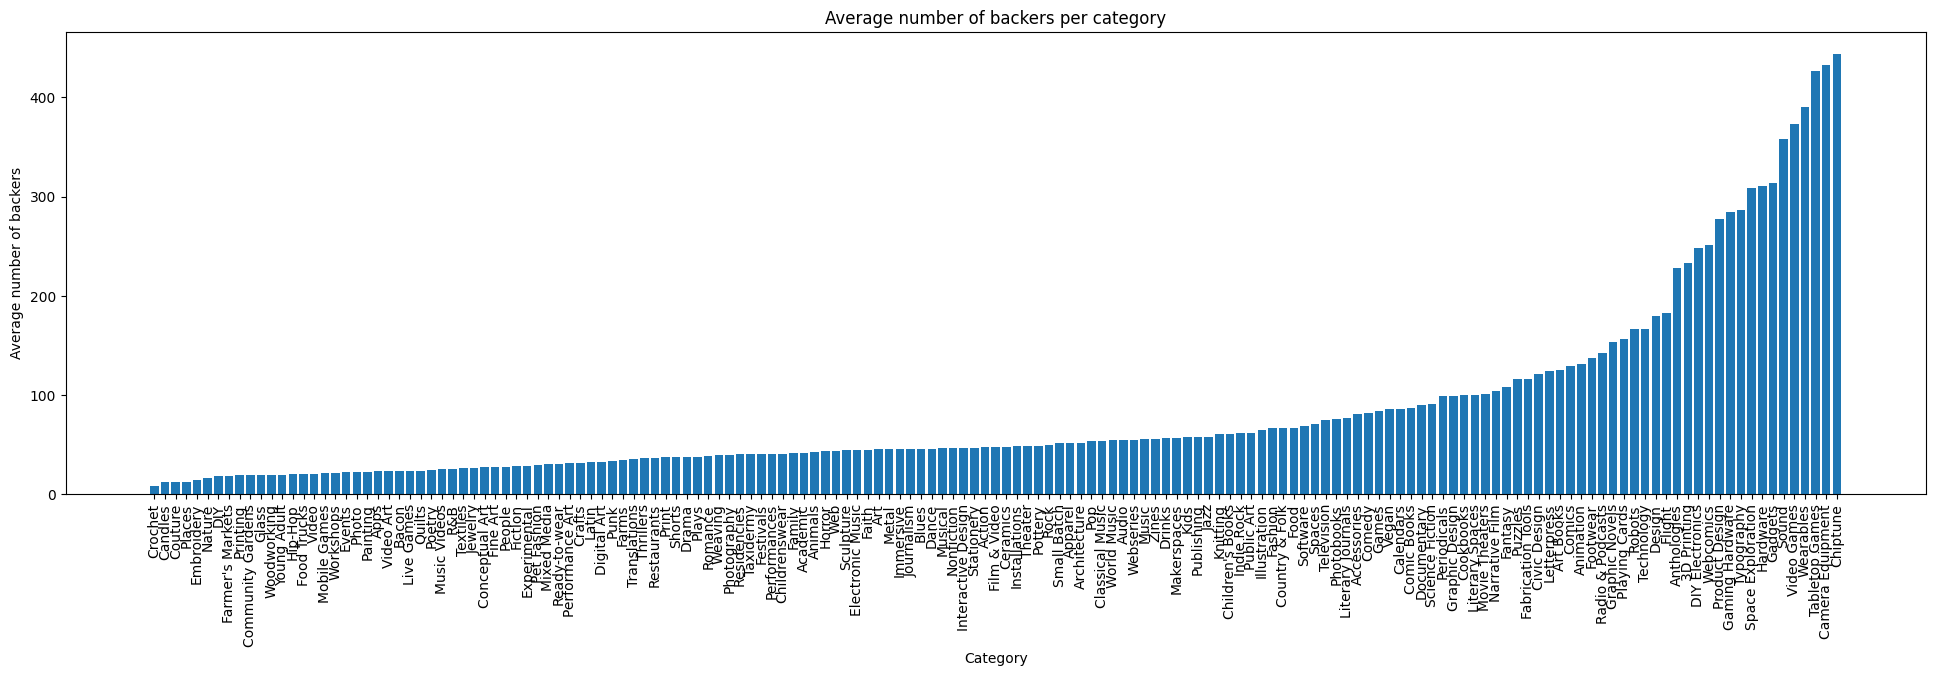

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute the average number of backers per category
avg_backers_by_category = df.groupby('category')['backers'].mean().sort_values()

# Create a bar chart
fig, ax = plt.subplots(figsize=(24, 6))
ax.bar(avg_backers_by_category.index, avg_backers_by_category.values, width=0.8)

# Set the chart title and axis labels
ax.set_title('Average number of backers per category')
ax.set_xlabel('Category')
ax.set_ylabel('Average number of backers')

# Rotate the category labels for better visibility
plt.xticks(rotation=90)

# Show the chart
plt.show()

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  **Pandas**, please answer the following questions:

**Question 1:** Write code which calculate the top-20 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [5]:
# Creating a dataset directory
!mkdir ./datasets/mcu

# download the dataset from Kaggle and unzip it
!kaggle datasets download csanhueza/the-marvel-universe-social-network  -p ./datasets/mcu
!chdir ./datasets/kickstarter-projects
!unzip  ./datasets/mcu/*.zip  -d ./datasets/mcu/

  0% 0.00/2.72M [00:00<?, ?B/s]
100% 2.72M/2.72M [00:00<00:00, 130MB/s]
/bin/bash: chdir: command not found
Archive:  ./datasets/mcu/the-marvel-universe-social-network.zip
  inflating: ./datasets/mcu/edges.csv  
  inflating: ./datasets/mcu/hero-network.csv  
  inflating: ./datasets/mcu/nodes.csv  


In [6]:
# Load data into a Pandas dataframe
df = pd.read_csv('/content/datasets/mcu/hero-network.csv')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Filter out rows where a hero is shown as a friend of themselves
df = df[df['hero1'] != df['hero2']]

# Filter out rows where a hero is shown as a friend of another hero, but the other hero doesn't exist in the dataset
heroes = df['hero1'].unique()
df = df[df['hero2'].isin(heroes)]

# Calculate the number of friends for each hero
hero_counts = pd.concat([df['hero1'], df['hero2']]).value_counts()

# Get the top 20 most friendly characters
top_20 = hero_counts.head(20)

print(top_20)

CAPTAIN AMERICA         2836
SPIDER-MAN/PETER PAR    2541
IRON MAN/TONY STARK     2222
WOLVERINE/LOGAN         2023
THING/BENJAMIN J. GR    2013
MR. FANTASTIC/REED R    1951
HUMAN TORCH/JOHNNY S    1931
SCARLET WITCH/WANDA     1927
THOR/DR. DONALD BLAK    1908
BEAST/HENRY &HANK& P    1828
VISION                  1809
INVISIBLE WOMAN/SUE     1789
HAWK                    1704
CYCLOPS/SCOTT SUMMER    1609
STORM/ORORO MUNROE S    1573
ANGEL/WARREN KENNETH    1557
HULK/DR. ROBERT BRUC    1556
WASP/JANET VAN DYNE     1548
SHE-HULK/JENNIFER WA    1531
DR. STRANGE/STEPHEN     1520
dtype: int64


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

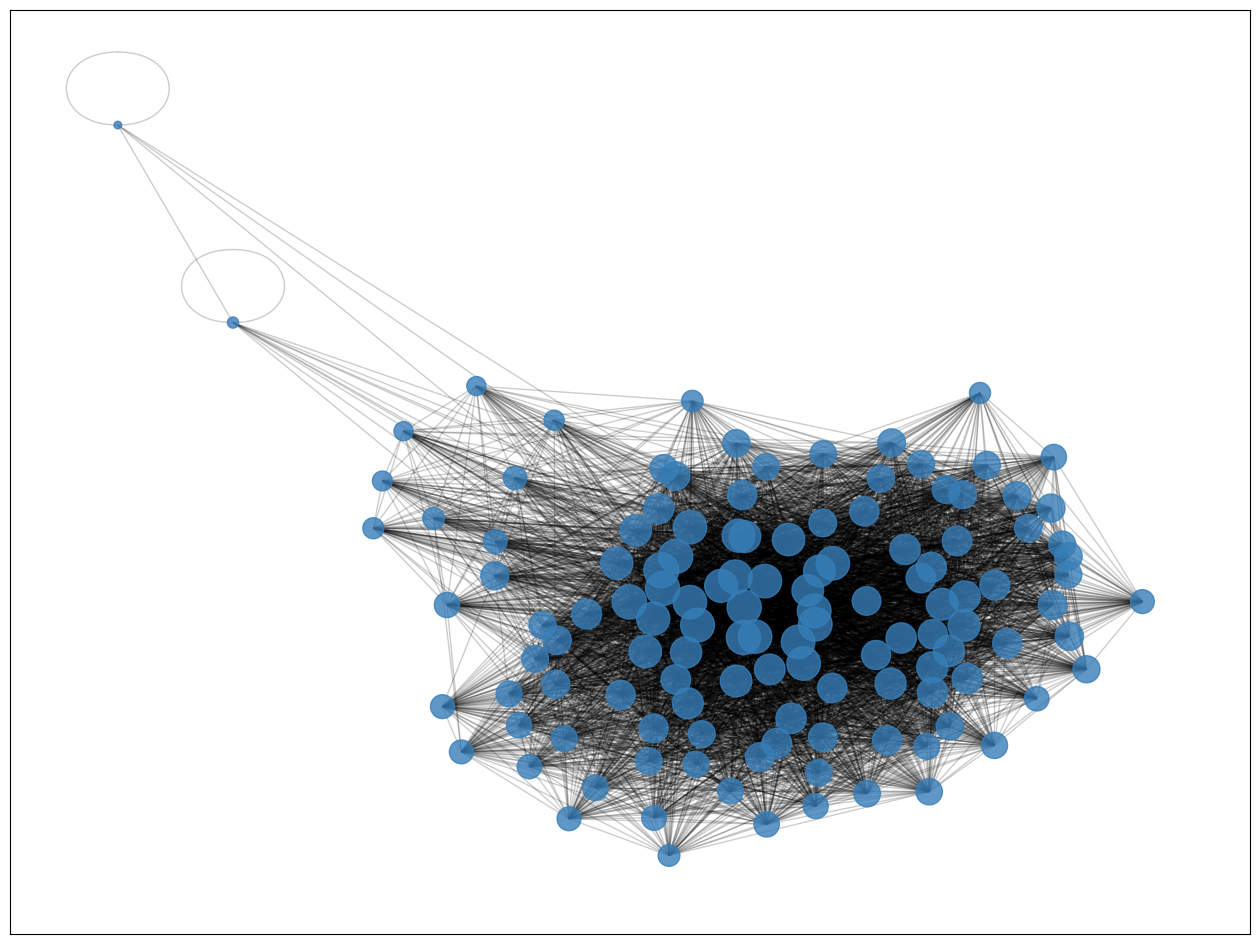

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load hero_network.csv and nodes.csv
hero_network = pd.read_csv('/content/datasets/mcu/hero-network.csv')
nodes = pd.read_csv('/content/datasets/mcu/nodes.csv')

# Get the 150 most "friendly" characters
top_150 = hero_network.groupby('hero1').count().sort_values(by='hero2', ascending=False).head(150).reset_index()

# Create the graph object
G = nx.Graph()

# Add nodes with attributes
node_types = dict(zip(nodes['node'], nodes['type']))  # New line
for index, row in nodes.iterrows():
    if row['node'] in list(top_150['hero1']):
        G.add_node(row['node'], size=top_150[top_150['hero1'] == row['node']]['hero2'].values[0])
        for col in nodes.columns[1:]:
            if col != 'node':
                G.nodes[row['node']][col] = row[col]

# Add edges
for index, row in hero_network.iterrows():
    if row['hero1'] in list(G.nodes()) and row['hero2'] in list(G.nodes()):
        G.add_edge(row['hero1'], row['hero2'])

# Set up positions for plotting
pos = nx.spring_layout(G)

# Color nodes by type
types = nodes['type'].unique()
colors = plt.cm.Set1.colors[:len(types)]
color_map = dict(zip(types, colors))

node_colors = [color_map[node_types[node]] for node in G.nodes() if node in node_types.keys()]  # Modified line
fig, ax = plt.subplots(figsize=(16, 12))

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=[d * 5 for n, d in G.degree()], node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax)

# Show the plot
plt.show()


**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) or [D3](https://d3js.org) (10pt)

In [11]:
pip install ipycytoscape


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.9 MB/s eta 0:00:00


In [30]:
import pandas as pd
import ipycytoscape

# Generate elements list for cytoscape graph
elements = []
for node in G.nodes():
    data = {'id': node, 'size': G.nodes[node]['size'], 'type': G.nodes[node]['type']}
    elements.append({'data': data})

for edge in G.edges():
    data = {'source': edge[0], 'target': edge[1]}
    elements.append({'data': data})




In [31]:
elements

[{'data': {'id': 'ANGEL/WARREN KENNETH', 'size': 3229, 'type': 'hero'}},
 {'data': {'id': 'ANT-MAN/DR. HENRY J.', 'size': 3727, 'type': 'hero'}},
 {'data': {'id': 'ANT-MAN II/SCOTT HAR', 'size': 732, 'type': 'hero'}},
 {'data': {'id': 'BALDER [ASGARDIAN]', 'size': 1301, 'type': 'hero'}},
 {'data': {'id': 'BANNER, BETTY ROSS T', 'size': 963, 'type': 'hero'}},
 {'data': {'id': 'BANSHEE/SEAN CASSIDY', 'size': 1388, 'type': 'hero'}},
 {'data': {'id': 'BEAST/HENRY &HANK& P', 'size': 4628, 'type': 'hero'}},
 {'data': {'id': 'BINARY/CAROL DANVERS', 'size': 1204, 'type': 'hero'}},
 {'data': {'id': 'BISHOP /', 'size': 813, 'type': 'hero'}},
 {'data': {'id': 'BLACK BOLT/BLACKANTO', 'size': 1116, 'type': 'hero'}},
 {'data': {'id': "BLACK PANTHER/T'CHAL", 'size': 1803, 'type': 'hero'}},
 {'data': {'id': 'BLOB/FRED J. DUKES', 'size': 785, 'type': 'hero'}},
 {'data': {'id': 'BOOMER/TABITHA SMITH', 'size': 1290, 'type': 'hero'}},
 {'data': {'id': 'CAGE, LUKE/CARL LUCA', 'size': 1063, 'type': 'hero'}}

In [34]:
import ipycytoscape
import pandas as pd

# Create a Cytoscape object
cyto = ipycytoscape.CytoscapeWidget()

# Set graph style
cyto.set_style([
    {
        'selector': 'node',
        'style': {
            'label': 'data(id)',
            'background-color': 'white',
            'shape': 'ellipse',
            'width': 'data(size)',
            'height': 'data(size)'
        }
    }
])

# Add nodes and edges to the graph
for index, row in nodes.iterrows():
    if row['node'] in list(top_150['hero1']):
        node_data = {
            'data': {
                'id': row['node'],
                'size': top_150[top_150['hero1'] == row['node']]['hero2'].values[0],
                'type': row['type']
            }
        }
        cyto.graph.add_graph_from_json([node_data])

# Color nodes by type
types = nodes['type'].unique()
for i, t in enumerate(types):
    cyto.graph.add_style(
        f"node[type = '{t}']",
        {
            'background-color': f"rgb({i*50}, {i*100}, {i*150})"
        }
    )

# Set layout and display the graph
cyto.set_layout(name='grid')
cyto


TypeError: ignored